In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests
# Import the API key
from config import weather_api_key

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

 (-68.63135238681625, -37.69949306174266),
 (-64.23515535009031, 59.99017053138323),
 (-67.10677805467245, -69.69589140920064),
 (-5.576961543944961, -179.85306098763579),
 (-83.41657032273997, -147.62347770992534),
 (46.73934561375657, -35.12685715569697),
 (28.13617496701707, -29.312028163988884),
 (78.61186171995826, -168.6019349215936),
 (-17.784198495103112, -92.71962882654019),
 (85.65104678134736, 132.18663605626966),
 (56.64536210612468, 47.79746567110925),
 (55.633027956539706, 121.29971343913377),
 (23.707007897624663, -60.799104436288445),
 (-16.491608863829015, 20.967943079857037),
 (29.58803851749427, 8.583581321304052),
 (-59.764013805057814, 31.535994694810114),
 (-88.08514439511565, 137.08680350152162),
 (-86.95923063146985, 148.5290932889938),
 (-15.041629535175161, -64.44075673561187),
 (5.246949868317259, 52.733927009624836),
 (22.764837424415006, 101.75901994162547),
 (-56.754122068053206, 11.274234961360776),
 (29.5707112675599, 19.50384091319532),
 (-53.0000547303

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each lat and long combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [8]:
from datetime import datetime

In [9]:
# 1. Import dependencies and initialize counters and an empty list that will hold the weather data
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# 2. Loop through the cities list
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 guarulhos
Processing Record 19 of Set 4 | kieta
Processing Record 20 of Set 4 | mar del plata
Processing Record 21 of Set 4 | ucluelet
Processing Record 22 of Set 4 | sile
Processing Record 23 of Set 4 | nsanje
Processing Record 24 of Set 4 | bilma
Processing Record 25 of Set 4 | kortkeros
Processing Record 26 of Set 4 | alice springs
Processing Record 27 of Set 4 | bembereke
Processing Record 28 of Set 4 | norman wells
Processing Record 29 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 30 of Set 4 | kavieng
Processing Record 31 of Set 4 | marawi
Processing Record 32 of Set 4 | ornskoldsvik
Processing Record 33 of Set 4 | saint george
Processing Record 34 of Set 4 | areia branca
Processing Record 35 of Set 4 | ribeira grande
Processing Record 36 of Set 4 | porto novo
Processing Record 37 of Set 4 | arlit
Processing Record 38 of Set 4 | suntar
Processing Record 39 of Set 4 | mlonggo
Processing Record 40 of Set 4 | deputatskiy
Processing Record 41 of Set 4 | troy
Pro

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,78.96,89,40,8.05,TO,2021-07-17 03:50:42
1,Dikson,73.5069,80.5464,34.29,89,94,9.80,RU,2021-07-17 03:50:43
2,Avarua,-21.2078,-159.7750,73.45,88,75,8.05,CK,2021-07-17 03:50:43
3,Karpathos,35.5070,27.2132,76.95,81,0,8.57,GR,2021-07-17 03:50:43
4,Tasiilaq,65.6145,-37.6368,37.74,75,0,8.05,GL,2021-07-17 03:50:44
5,Punta Arenas,-53.1500,-70.9167,33.91,93,20,11.50,CL,2021-07-17 03:46:23
6,Tripoli,32.8752,13.1875,76.35,67,0,6.93,LY,2021-07-17 03:50:40
7,Rikitea,-23.1203,-134.9692,72.73,68,1,7.16,PF,2021-07-17 03:50:44
8,Tigzirt,36.8886,4.1198,71.10,56,0,7.25,DZ,2021-07-17 03:50:44
9,Bredasdorp,-34.5322,20.0403,43.92,81,1,6.91,ZA,2021-07-17 03:50:45


In [12]:
# new_column order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-07-17 03:50:42,-21.2000,-175.2000,78.96,89,40,8.05
1,Dikson,RU,2021-07-17 03:50:43,73.5069,80.5464,34.29,89,94,9.80
2,Avarua,CK,2021-07-17 03:50:43,-21.2078,-159.7750,73.45,88,75,8.05
3,Karpathos,GR,2021-07-17 03:50:43,35.5070,27.2132,76.95,81,0,8.57
4,Tasiilaq,GL,2021-07-17 03:50:44,65.6145,-37.6368,37.74,75,0,8.05


In [13]:
   # Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

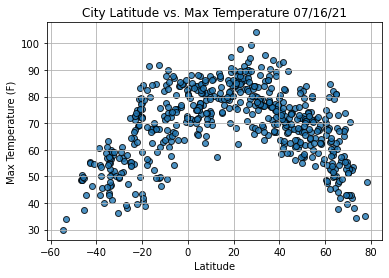

In [18]:
# Import the time module
import time

# Build the scatter plot for lat and vs max temp.
plt.scatter(
    lats,
    max_temps,
    edgecolor="black", linewidth=1, marker="o",
    alpha=0.8, label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

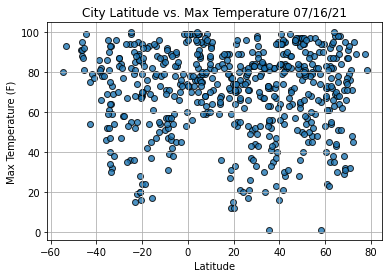

In [19]:
# Build the scatter plot for lat and vs humidity
plt.scatter(
    lats,
    humidity,
    edgecolor="black", linewidth=1, marker="o",
    alpha=0.8, label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

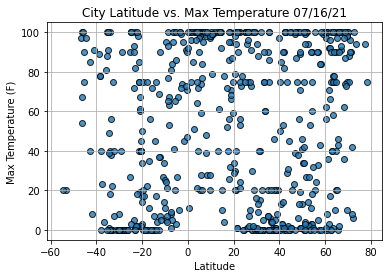

In [20]:
# Build the scatter plot for lat and vs cloudiness.
plt.scatter(
    lats,
    cloudiness,
    edgecolor="black", linewidth=1, marker="o",
    alpha=0.8, label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

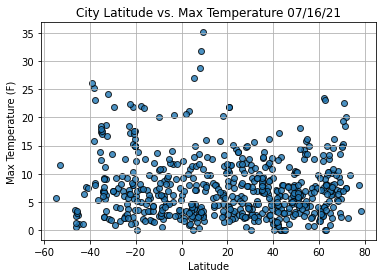

In [21]:
# Build the scatter plot for lat and vs wind speed.
plt.scatter(
    lats,
    wind_speed,
    edgecolor="black", linewidth=1, marker="o",
    alpha=0.8, label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Create a Northern and Souther Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

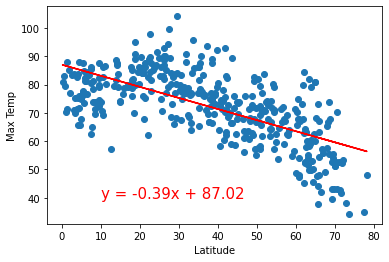

In [40]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

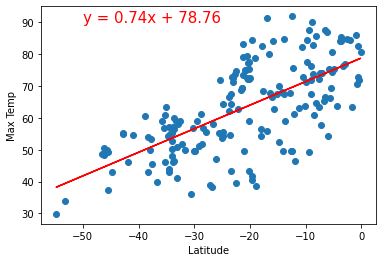

In [42]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

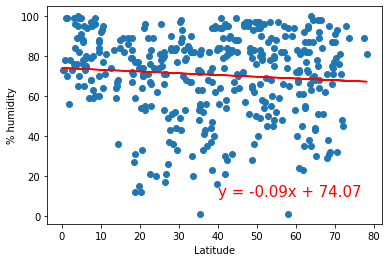

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% humidity',(40,10))

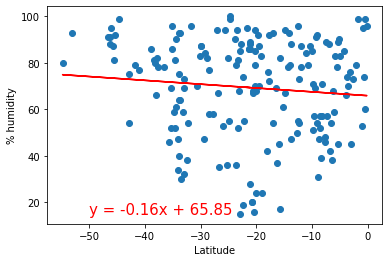

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% humidity',(-50,15))

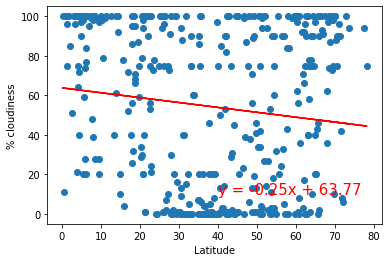

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% cloudiness',(40,10))

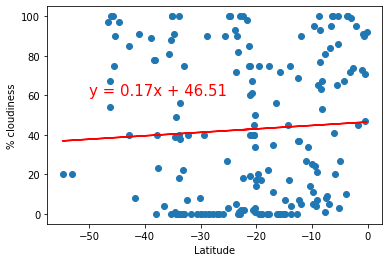

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% cloudiness',(-50,60))

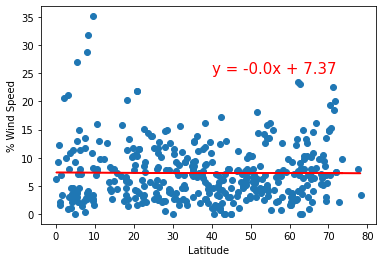

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(40,25))

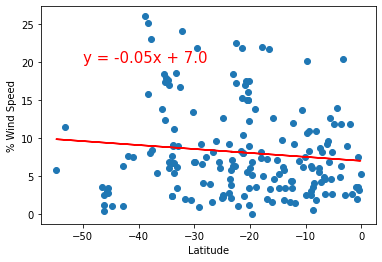

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(-50,20))